# Assignment 4 - Unsupervised Learning and Neural Networks

## *Derek Wales*
Netid: xxxx

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. </br>
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

Sources: </br>
https://towardsdatascience.com/spectral-clustering-aba2640c0d5b </br>
https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e </br>
https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/ </br>

In [1]:
# Importing several libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
### Part A ### 
# Building the Kmeans algorithm

class Kmeans_self:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

In [3]:
### Part B ###
# Testing your Kmeans Algorithm and plotting the elbow curve
# Unable to implement all features of the Kmeans from scratch algorithm, so I used Sklearn.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

# Making the Clusters
two_cluster =  make_blobs(n_samples=5000, n_features=2, centers = 2, random_state=0)
five_cluster = make_blobs(n_samples=5000, n_features=2, centers = 5, random_state=0)

In [4]:
# Plotting the elbow curve for Two Cluster Dataset
# Creating variables
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,11)
X = two_cluster[0]

distortions_1 = [] 
inertias_1 = [] 
mapping1_1 = {} 
mapping2_1 = {} 
K_1 = range(1,11)
X_1 = five_cluster[0]

# Looping over the values of K for the Two cluster Dataset
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

    
# Looping over the values of K for the Five cluster Dataset
for k in K_1: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X_1) 
    kmeanModel.fit(X_1)     
      
    distortions_1.append(sum(np.min(cdist(X_1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_1.shape[0]) 
    
    inertias.append(kmeanModel.inertia_) 
  
    mapping1_1[k] = sum(np.min(cdist(X_1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_1.shape[0] 
    mapping2_1[k] = kmeanModel.inertia_       

In [5]:
# Finding the Centers
kmeanModel_two = KMeans(n_clusters=2).fit(X) 
kmeanModel_two.fit(X) 

kmeanModel_five = KMeans(n_clusters=5).fit(X_1) 
kmeanModel_five.fit(X_1) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'The Elbow Method for Five Clusters')

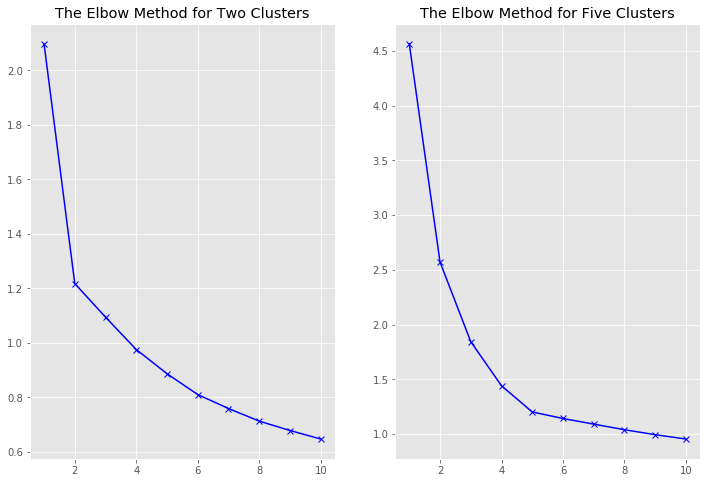

In [6]:
# Plotting K
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,8))
axes[0].plot(K, distortions, 'bx-') 
axes[0].set_title('The Elbow Method for Two Clusters')

axes[1].plot(K_1, distortions_1, 'bx-') 
axes[1].set_title('The Elbow Method for Five Clusters') 

**Graph Explaination:** The elbow method works by determining the amount of variance for a number of clusters. A sharp decline in the slope will create an elbow which will usually tell you the number of clusters in a dataset. Here we can see that two and five respectively are the points in our dataset.

Text(0.5, 1.0, 'Five Cluster: X Marks the Centroid')

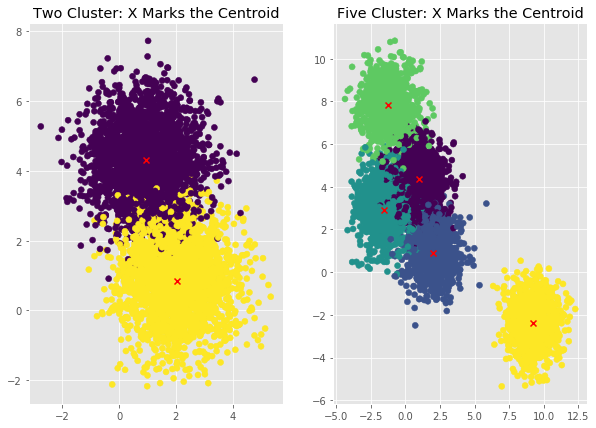

In [7]:
# Plotting the created datasets w/centroids
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
axes[0].scatter(two_cluster[0][:,0], two_cluster[0][:,1], c = two_cluster[1])
axes[0].scatter(kmeanModel_two.cluster_centers_[:,0],kmeanModel_two.cluster_centers_[:,1], marker = 'x', color = "r")
axes[0].set_title('Two Cluster: X Marks the Centroid') 

axes[1].scatter(five_cluster[0][:,0], five_cluster[0][:,1], c = five_cluster[1])
axes[1].scatter(kmeanModel_five.cluster_centers_[:,0],kmeanModel_five.cluster_centers_[:,1], marker = 'x',color = 'r')
axes[1].set_title("Five Cluster: X Marks the Centroid")

**Part C:** </br>
**Concept Question: Explaining clustering algorithms.**

**K-means:** Works by choosing a number of clusters, k, and then randomly assigns a point to each cluster. After which the computer computes the cluster centroid by taking the mean vector of points in the cluster and assigns the data point to the cluster which has closest centroid. This process is repeated until the clusters stop changing. 

**Agglomerative Clustering:** A bottom up method starting with each point belonging to one cluster, then the alogrithm pairs the two closest clusters. This process repeats until there is only the required number of clusters remaining. 

**Gaussian Mixture Models:** Involves mixing Gaussian distributions from each cluster along the same train to determine the probablity denisty for a point to belong to a certain class. This allows GMM to excel with cluster variance and feature correlation.

**DBSCAN:** DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement. This makes it very effective at clustering noisy data.

**Spectral CLustering:** Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. The method is flexible and allows us to cluster non graph data as well.

In [8]:
import pandas as pd
import math

In [9]:
# Creating column names
col_names = ['x1', 'x2','cluster']

# Reading in the data
aggregation = pd.read_csv('_data/Aggregation.txt', sep = '\t', names=col_names)
compound = pd.read_csv('_data/Compound.txt', sep = '\t', names=col_names)
d31 = pd.read_csv('_data/D31.txt', sep = '\t', names=col_names)
jain = pd.read_csv('_data/jain.txt', sep = '\t', names=col_names)

# Dropping all cluster labels
aggregation = aggregation.drop('cluster', axis = 1)
compound = compound.drop('cluster', axis = 1)
d31 = d31.drop('cluster', axis = 1)
jain = jain.drop('cluster', axis = 1)

In [10]:
# Importing Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn import metrics 
from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Jain: Clusters = 2')

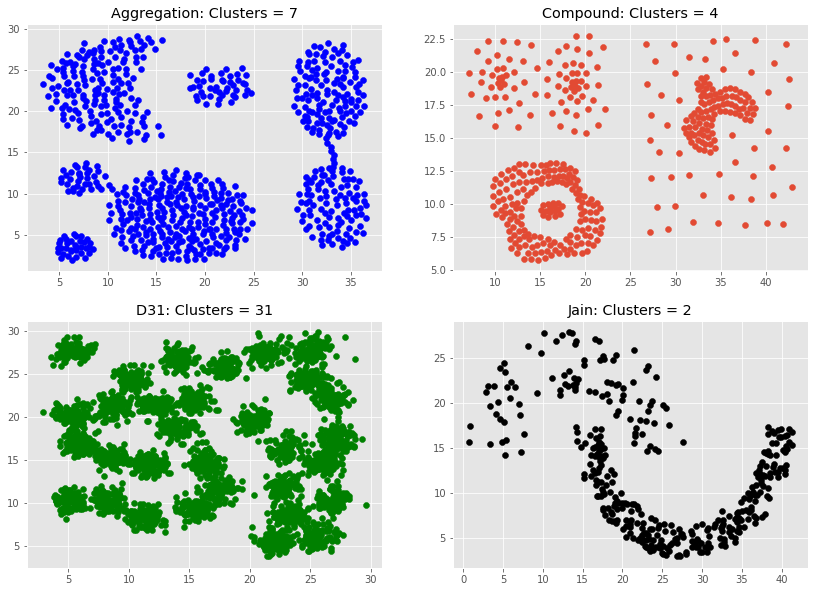

In [11]:
# EDA on all of the Datasets
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes[0,0].scatter(aggregation.x1, aggregation.x2, color ='b')
axes[0,0].set_title("Aggregation: Clusters = 7")

axes[0,1].scatter(compound.x1, compound.x2)
axes[0,1].set_title("Compound: Clusters = 4")

axes[1,0].scatter(d31.x1, d31.x2, color = 'g')
axes[1,0].set_title("D31: Clusters = 31")

axes[1,1].scatter(jain.x1, jain.x2, color = 'black')
axes[1,1].set_title("Jain: Clusters = 2")

In [12]:
## Testing K Means perfromance ##
# Aggregation Data Set (K = 7)
kmeans_agg = KMeans(n_clusters=7)
kmeans_agg.fit(aggregation)

# Compound Data Set (K = 4)
kmeans_comp = KMeans(n_clusters=4)
kmeans_comp.fit(compound)

# D31 Data Set (K = 31)
kmeans_d31 = KMeans(n_clusters=31)
kmeans_d31.fit(d31)

# Jain Data Set (K = 2)
kmeans_jain = KMeans(n_clusters=2)
kmeans_jain.fit(jain)

### BREAK ###

## Testing Agglomerative Performance ##
# Aggregation Data Set (K = 7)
agglomerative_agg = AgglomerativeClustering(n_clusters=7)
agglomerative_agg.fit(aggregation)

# Compound Data Set (K = 4)
agglomerative_comp = AgglomerativeClustering(n_clusters=4)
agglomerative_comp.fit(compound)

# D31 Data Set (K = 31)
agglomerative_d31 = AgglomerativeClustering(n_clusters=31)
agglomerative_d31.fit(d31)

# Jain Data Set (K = 2)
agglomerative_jain = AgglomerativeClustering(n_clusters=2)
agglomerative_jain.fit(jain)

### BREAK ###

## Testing GaussianMixture Performance
# Aggregation Data Set (K = 7)
gmm_agg = GaussianMixture(n_components=7)
gmm_agg_val = gmm_agg.fit_predict(aggregation)

# Compound Data Set (K = 4)
gmm_comp = GaussianMixture(n_components=4)
gmm_comp_val = gmm_comp.fit_predict(compound)

# D31 Data Set (K = 31)
gmm_d31 = GaussianMixture(n_components=31)
gmm_d31_val = gmm_d31.fit_predict(d31)

# Jain Data Set (K = 2)
gmm_jain = GaussianMixture(n_components=2)
gmm_jain_val = gmm_jain.fit_predict(jain)

### BREAK ### 

## Testing DBSCAN Performance
# Aggregation Data Set
db_agg = DBSCAN(eps=3, min_samples=2).fit_predict(aggregation)

# Compound Data Set
db_comp = DBSCAN(eps=3, min_samples=2).fit_predict(compound)

# D31 Data Set
db_d31 = DBSCAN(eps=.7, min_samples=10).fit_predict(d31)

# Jain Data Set
db_jain = DBSCAN(eps=1.5, min_samples=10).fit_predict(jain)

### BREAK ###

## Testing SpectralClustering Performance
# Aggregation Data Set (K = 7)
sc_agg = SpectralClustering(n_components=7)
sc_agg = sc_agg.fit(aggregation)

# Compound Data Set (K = 4)
sc_comp = SpectralClustering(n_components=4)
sc_comp = sc_comp.fit(compound)

# D31 Data Set (K = 31)
sc_d31 = SpectralClustering(n_components=31)
sc_d31 = sc_d31.fit(d31)

# Jain Data Set (K = 2)
sc_jain = SpectralClustering(n_components=2)
sc_jain = sc_jain.fit(jain)

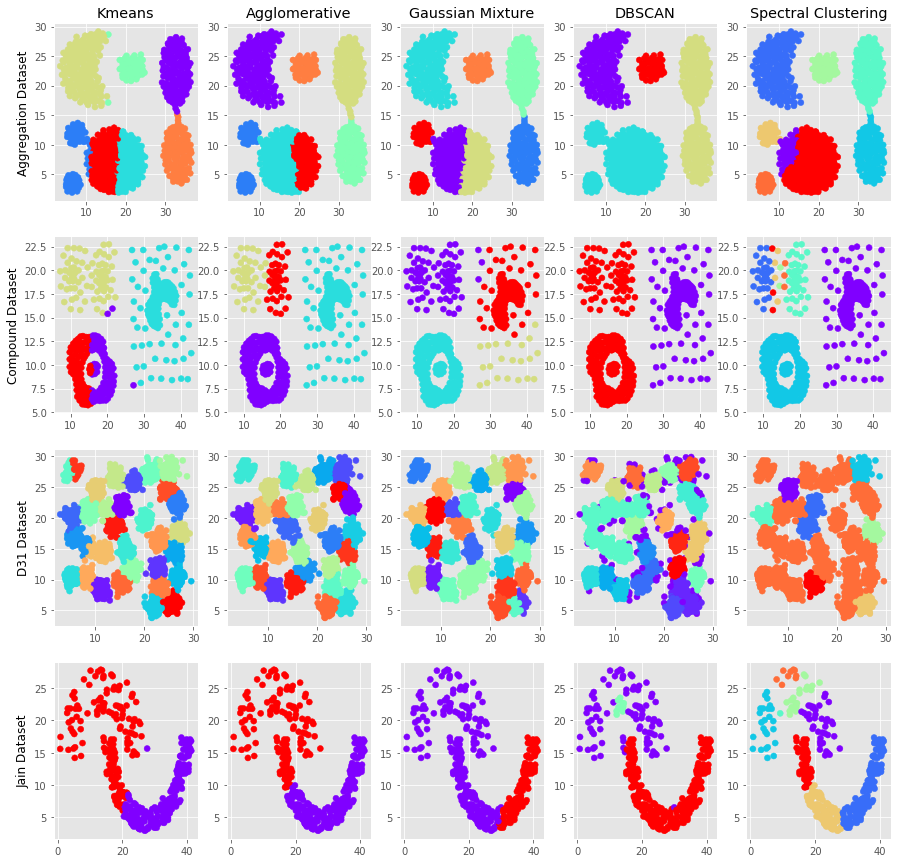

In [13]:
# Plotting the Data 
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15))

# Plot of K Means Per Dataset
axes[0,0].scatter(aggregation.x1, aggregation.x2, c=kmeans_agg.labels_, cmap='rainbow')
axes[0,0].set_title("Kmeans")
axes[0,0].set_ylabel('Aggregation Dataset',color='black')
axes[1,0].scatter(compound.x1, compound.x2, c=kmeans_comp.labels_, cmap='rainbow')
axes[1,0].set_ylabel('Compound Dataset',color='black')
axes[2,0].scatter(d31.x1, d31.x2, c=kmeans_d31.labels_, cmap='rainbow')
axes[2,0].set_ylabel('D31 Dataset',color='black')
axes[3,0].scatter(jain.x1, jain.x2, c=kmeans_jain.labels_, cmap='rainbow')
axes[3,0].set_ylabel('Jain Dataset',color='black')

# Plot of Agglomerative 
axes[0,1].scatter(aggregation.x1, aggregation.x2, c=agglomerative_agg.labels_, cmap='rainbow')
axes[0,1].set_title("Agglomerative")
axes[1,1].scatter(compound.x1, compound.x2, c=agglomerative_comp.labels_, cmap='rainbow')
axes[2,1].scatter(d31.x1, d31.x2, c=agglomerative_d31.labels_, cmap='rainbow')
axes[3,1].scatter(jain.x1, jain.x2, c=agglomerative_jain.labels_, cmap='rainbow')

# Gaussian Mixture Models
axes[0,2].scatter(aggregation.x1, aggregation.x2, c=gmm_agg_val, cmap='rainbow')
axes[0,2].set_title("Gaussian Mixture")
axes[1,2].scatter(compound.x1, compound.x2, c=gmm_comp_val, cmap='rainbow')
axes[2,2].scatter(d31.x1, d31.x2, c=gmm_d31_val, cmap='rainbow')
axes[3,2].scatter(jain.x1, jain.x2, c=gmm_jain_val, cmap='rainbow')

# Plot of DBSCAN Method
axes[0,3].scatter(aggregation.x1, aggregation.x2, c=db_agg, cmap='rainbow')
axes[0,3].set_title("DBSCAN")
axes[1,3].scatter(compound.x1, compound.x2, c=db_comp, cmap='rainbow')
axes[2,3].scatter(d31.x1, d31.x2, c=db_d31, cmap='rainbow')
axes[3,3].scatter(jain.x1, jain.x2, c=db_jain, cmap='rainbow')

# Plot of SpectralClustering
axes[0,4].scatter(aggregation.x1, aggregation.x2, c=sc_agg.labels_, cmap='rainbow')
axes[0,4].set_title("Spectral Clustering")
axes[1,4].scatter(compound.x1, compound.x2, c=sc_comp.labels_, cmap='rainbow')
axes[2,4].scatter(d31.x1, d31.x2, c=sc_d31.labels_, cmap='rainbow')
axes[3,4].scatter(jain.x1, jain.x2, c=sc_jain.labels_, cmap='rainbow')

**Part D:**</br>
**Concept Questions:** Which method works best or worst on each dataset and why? </br>
**Aggregation Dataset:** Spectral Clustering was the best approach for this dataset because it does not get effected by the shape of the clusters, because spectral clustering works via graph theory identifying clusters based on the edges that connect them. </br>
**Compound Dataset:** For this dataset agglomerative clustering was the most effective, because it uses a bottom up approach of merging the two most similar datasets. Since this dataset had a concentration in the middle, it was effectively able to build out from there. </br>
**D31 Dataset:** This data had lots of small sections of points. Because of that, KMeans which works by finding the center of the closest collections preformed well. </br>
**D31 Jain:** On the final Dataset, the DBSCAN was the most effective (after some tuning of the parameters). This is because it DBSCAN works by grouping based upon the dense region of data points.

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWERS**

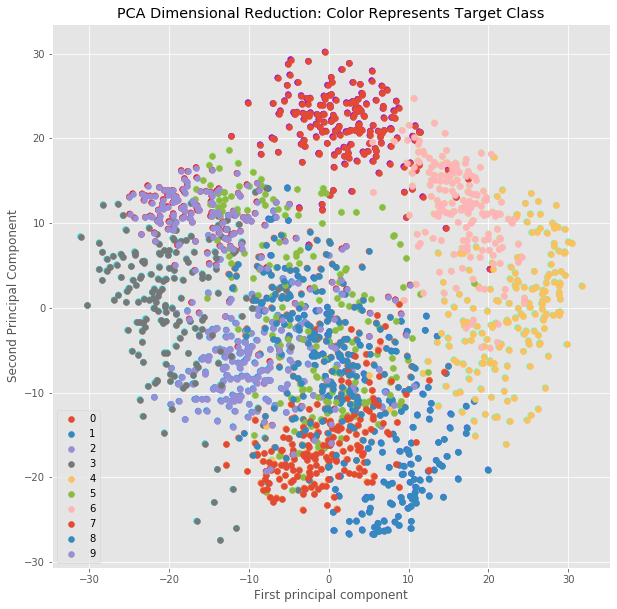

In [14]:
### Part A ### 
# Reducing dimensionality with PCA and visualizing

# Loading the Libraries
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Instantiating the digits
digits = load_digits()

# Making DFs
df1 = pd.DataFrame(digits['data'])
df2 = pd.DataFrame(digits['target'])
df2 = df2.rename(columns={0:'target'})

# Combining into an analysis DF
frames = [df1,df2]
df3 = pd.concat(frames, axis=1)

# Reducing from 64 attributes to 2
pca = PCA(n_components=2)
pca.fit(df3)
x_pca = pca.transform(df3)

# Plotting the Data
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df3['target'],cmap='rainbow')

for i in digits.target_names:
    loc = np.where(digits.target == i)                             
    plt.scatter(x_pca[loc, 0], x_pca[loc, 1], label = i) 

plt.title("PCA Dimensional Reduction: Color Represents Target Class")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(loc = "lower left")
plt.show()

Variance unexplained by the first two components = 71.49%


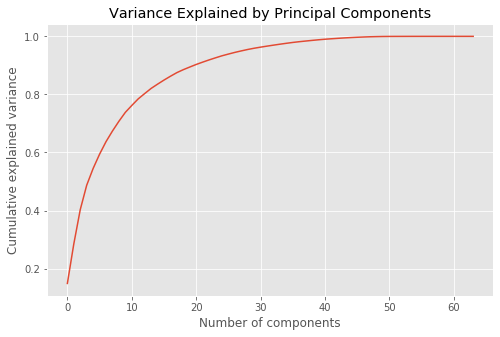

In [15]:
### Part B ###
# Creating a plot of the variance explained by the two components.

pca = PCA().fit(df1)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
print('Variance unexplained by the first two components = {:.2f}%'.format(100*(1 - pca.explained_variance_ratio_[:2].sum())))

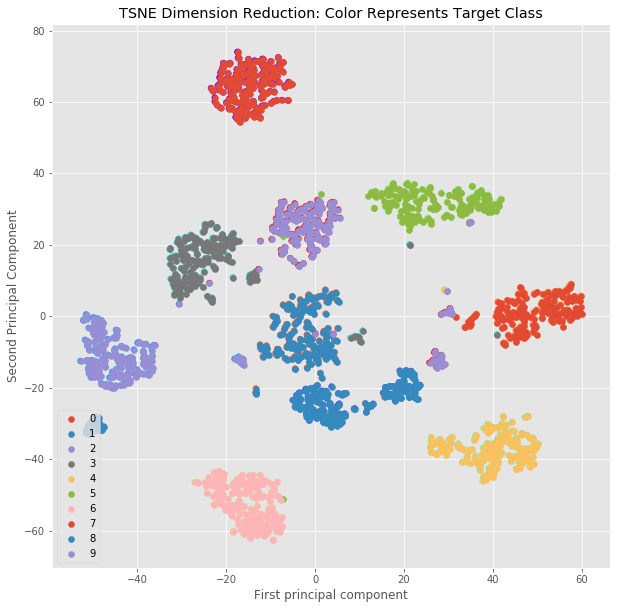

In [16]:
### Part C ### 
# Reducing dimensionality with t-SNE and visualizing

# Importing TSNE
from sklearn.manifold import TSNE

# Fitting/Transforming
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(df3)

# Plotting the Data
plt.figure(figsize=(10,10))
plt.scatter(tsne_fit[:,0],tsne_fit[:,1],c=df3['target'],cmap='rainbow')

for i in digits.target_names:
    loc = np.where(digits.target == i)                             
    plt.scatter(tsne_fit[loc, 0], tsne_fit[loc, 1], label = i) 

plt.title("TSNE Dimension Reduction: Color Represents Target Class")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend(loc = "lower left")
plt.show()

**Part D:**</br>
**Concept Question:** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.

**Answer:** The graph shows that t-SNE is much better at separating clusters than PCA. This is because PCA uses orthogonal vectors that can have a good bit of overlap, while t-SNE constructs a probability distribution over pairs of high-dimensional then projects that onto a lower dimensional space. This is more computationally expensive than PCA, but better at putting data into well separated clusters. 

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

In [17]:
from sklearn.datasets import make_moons

# Importing Machine Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

### Note:
Abishek Baral coached me through the by hand method after the assignment was submitted. 
Original work is at the bottom of the notebook

In [18]:
class myNeuralNetwork(object):
    def __init__(self, n_in, n_layer1, n_layer2, n_out, learning_rate=0.1):
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.learning_rate = learning_rate
        
        self.w1 = np.random.randn(self.n_layer1, self.n_in)
        self.w2 = np.random.randn(self.n_layer2, self.n_layer1)
        self.w3 = np.random.randn(self.n_out, self.n_layer2)
        pass
    
    
    def forward_propagation(self, x):
        self.x = x.reshape(-1, 1)
        
        self.z1 = self.w1 @ self.x
        self.a1 = self.sigmoid(self.z1)
        
        self.z2 = self.w2 @ self.a1
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = self.w3 @ self.a2
        self.a3 = self.sigmoid(self.z3)
        
        y_hat = self.a3
        return y_hat
    
    def compute_loss(self, X, y):
        errors = (y - self.predict_proba(X))**2
        mean_error = errors.mean()
        return mean_error
    
    
    def backpropagate(self, x, y):
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)
        y_hat = self.forward_propagation(x)
        self.dE_dw3 = (y_hat - y) * (self.sigmoid(self.z3)) * (1 - self.sigmoid(self.z3)) @ (self.a2.T)
        self.dE_dw2 = ((self.w3.T @ ((y_hat - y) * (self.sigmoid(self.z3)) * (1 - self.sigmoid(self.z3)))) * ((self.sigmoid(self.z2)) * (1 - self.sigmoid(self.z2)))) @ self.a1.T
        self.dE_dw1 = ((self.w2.T @ (((self.w3.T @ ((y_hat - y) * (self.sigmoid(self.z3)) * (1 - self.sigmoid(self.z3)))) * ((self.sigmoid(self.z2)) * (1 - self.sigmoid(self.z2)))))) * ((self.sigmoid(self.z1)) * (1 - self.sigmoid(self.z1)))) @ self.x.T
        pass
    
    
    def stochastic_gradient_descent_step(self):
        self.w3 -= self.learning_rate * self.dE_dw3
        self.w2 -= self.learning_rate * self.dE_dw2
        self.w1 -= self.learning_rate * self.dE_dw1
        pass
    
    
    def fit(self, X, y, max_epochs=100, get_validation_loss=False, verbose=False):
        n_samples = X.shape[0]
        train_losses = []
        val_losses = []
        
        for epoch in range(max_epochs):
            
            shuffled_indices = np.random.choice(np.arange(X.shape[0]), size = X.shape[0], replace=False)
            X = X[shuffled_indices]
            y = y[shuffled_indices]
            
            
            X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
            
            
            for sample in range(X_train.shape[0]):                
               
                self.forward_propagation(X_train[sample])
                self.backpropagate(X_train[sample], y_train[sample])
                self.stochastic_gradient_descent_step()
                pass
            
            
            train_losses.append(self.compute_loss(X_train, y_train))
            val_losses.append(self.compute_loss(X_val, y_val))
        
        
        if(get_validation_loss):
            return train_losses, val_losses
        else:
            return train_losses
    
    
    def predict_proba(self, X):
        z1 = self.w1 @ X.T
        a1 = self.sigmoid(z1)
        z2 = self.w2 @ a1
        a2 = self.sigmoid(z2)
        z3 = self.w3 @ a2
        y_hat = self.sigmoid(z3)            
        return y_hat.flatten()
    
    def predict(self, X, decision_thresh=0.5):
        y_hat = self.predict_proba(X)
        y_hat[y_hat > decision_thresh]  = 1
        y_hat[y_hat <= decision_thresh] = 0    
        return y_hat.flatten()
    
    def sigmoid(self, X):
        X_sigmoid = 1 / (1 + np.exp(-X))
        return X_sigmoid
    
    def sigmoid_derivative(self, X):
        return self.sigmoid(X) * (1 - self.sigmoid(X))

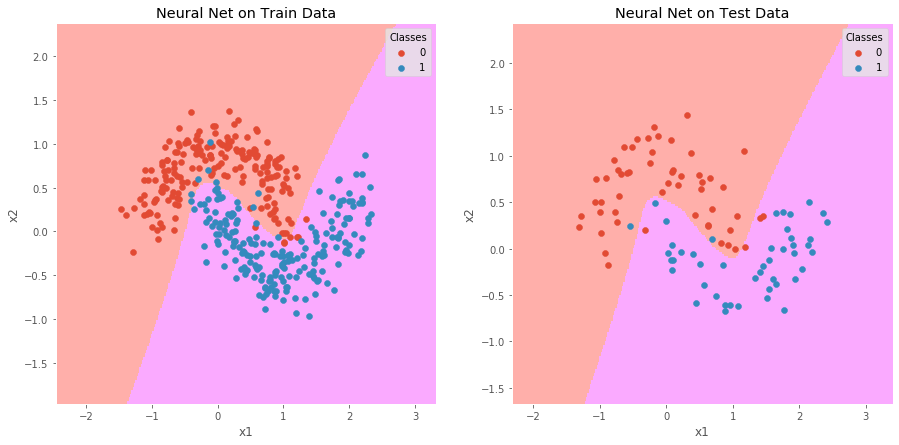

In [19]:
### Part B ### 

N_train = 500
X, y = make_moons(n_samples=N_train, noise=0.20)

N_test  = 100
X_test, y_test = make_moons(n_samples=N_test, noise=0.20)

num_epochs = 500
lr = 1
n_in = X.shape[1]
n_hidden_1 = 5
n_hidden_2 = 5
n_out = 1
nn = myNeuralNetwork(n_in=n_in, n_layer1=n_hidden_1, n_layer2=n_hidden_2, n_out=n_out, learning_rate=lr)

train_loss, val_loss = nn.fit(X, y, max_epochs=num_epochs, get_validation_loss=True)

y_hat_nn = nn.predict_proba(X_test)


def nn_plot(X, y, model):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    
    x_min_train, x_max_train = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min_train, y_max_train = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    x_min_test, x_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    
    step = 0.02
    xx_train, yy_train = np.meshgrid(np.arange(x_min_train, x_max_train, step), np.arange(y_min_train, y_max_train, step))
    Z_train = np.array(model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])).reshape(xx_train.shape)
    
    xx_test, yy_test = np.meshgrid(np.arange(x_min_test, x_max_test, step), np.arange(y_min_test, y_max_test, step))
    Z_test = np.array(model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])).reshape(xx_test.shape)

    cmap_light = ListedColormap(['#FFAFAA', '#AAFFAA', '#FAAAFF'])
    ax_train.pcolormesh(xx_train, yy_train, Z_train, cmap=cmap_light)
    ax_test.pcolormesh(xx_test, yy_test, Z_test, cmap=cmap_light)
    
    ax_train.scatter(X_train[np.where(y_train==0), 0], X_train[np.where(y_train==0), 1], label="0")
    ax_train.scatter(X_train[np.where(y_train==1), 0], X_train[np.where(y_train==1), 1], label="1")
    legend = ax_train.legend(title="Classes")
    
    ax_test.scatter(X_test[np.where(y_test==0), 0], X_test[np.where(y_test==0), 1], label="0")
    ax_test.scatter(X_test[np.where(y_test==1), 0], X_test[np.where(y_test==1), 1], label="1")
    legend = ax_test.legend(title="Classes")
    
    ax_train.set_xlabel('x1')
    ax_train.set_ylabel('x2')
    ax_train.set_title('Neural Net on Train Data')
    ax_train.set_xlim(xx_train.min(), xx_train.max())
    ax_train.set_ylim(yy_train.min(), yy_train.max())
    
    ax_test.set_xlabel('x1')
    ax_test.set_ylabel('x2')
    ax_test.set_title('Neural Net on Test Data')
    ax_test.set_xlim(xx_test.min(), xx_test.max())
    ax_test.set_ylim(yy_test.min(), yy_test.max())
    
    pass
# graphing code found on google
nn_plot(X, y, nn)

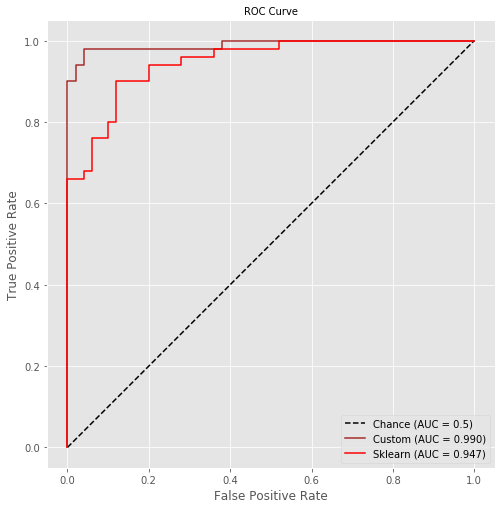

In [20]:
num_epochs = 500
lr = 1e-3
n_hidden_1 = 5
n_hidden_2 = 5

sk_nn = MLPClassifier(hidden_layer_sizes=(n_hidden_1, n_hidden_2), 
                    activation='logistic', 
                    solver='sgd', 
                    alpha=0.0, 
                    batch_size=1, 
                    learning_rate='constant', 
                    learning_rate_init=lr, 
                    max_iter=num_epochs, 
                    shuffle=True, 
                    random_state=4, 
                    verbose=False,
                    nesterovs_momentum=False, 
                    early_stopping=False, 
                    validation_fraction=0.2, 
                    n_iter_no_change=10)


sk_nn.fit(X, y)

y_hat_sk = sk_nn.predict_proba(X_test)[:, 1]

def plot_roc_curve(y_true, y_pred_1, y_pred_2):
    
    plt.figure(figsize=(7, 7))
    
    major_class = np.argmax(np.bincount(y))
    pred = [major_class for _ in range(len(y_true))]
    auc = metrics.roc_auc_score(y_true, pred)
    fpr, tpr, _ = metrics.roc_curve(y_true, pred)
    plt.plot(fpr, tpr, '--', color='black', label='Chance (AUC = {:.1f})'.format(auc))
    
   
    auc_1           = metrics.roc_auc_score(y_true, y_pred_1)
    fpr_1, tpr_1, _ = metrics.roc_curve(y_true, y_pred_1)
    plt.plot(fpr_1, tpr_1, color='brown', label='Custom (AUC = {:.3f})'.format(auc_1))
    
   
    auc_2 = metrics.roc_auc_score(y_true, y_pred_2)
    fpr_2, tpr_2, _ = metrics.roc_curve(y_true, y_pred_2)
    plt.plot(fpr_2, tpr_2, color='red', label='Sklearn (AUC = {:.3f})'.format(auc_2))
    
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title('ROC Curve', fontsize=10)
    pass
# graph code found on google

plot_roc_curve(y_test, y_hat_nn, y_hat_sk)

**Part C:** </br>
**Concept Question:** Suggest two ways in which you neural network implementation could be improved. </br>
**Answer:** This algorithm could be improved by adding the ability to tune more of the hyperparamenters as seen in Sklearns multi layer perceptron classifier (MLPC). Which also gives the options of changing the activation functions (such as rectified linear units or step), adding early stopping, or a dropout rate.

### My Implementation of Neural Networks w/Sklearn (after the from scratch method failed)

In [23]:
# Creating the Train/Test Datasets
X_train, y_train = make_moons(n_samples=500, noise=0.2, random_state=101)
X_test, y_test = make_moons(n_samples=100, noise=0.2, random_state=101)

In [24]:
# Building the model (infers the input shape of 2 nodes)
model = Sequential()

# Hidden layers with five nodes each
model.add(Dense(units=5,activation='sigmoid'))
model.add(Dense(units=5,activation='sigmoid'))

# Output node
model.add(Dense(units=1,activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
# Fitting the Model
model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)

Text(0.5, 1.0, 'Plot of the Test Data')

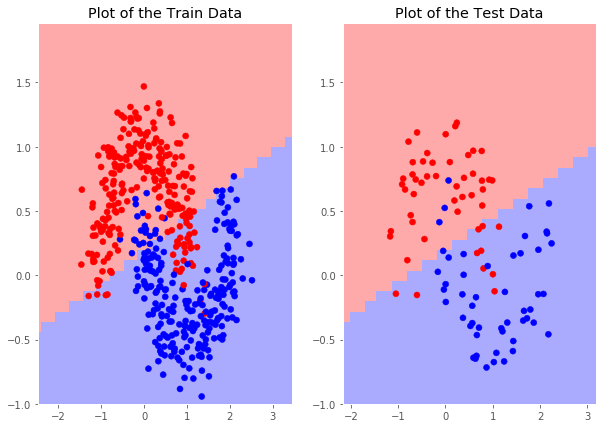

In [26]:
# Preparing Data
h = .08 
        
# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])

# calculate min, max and limits (training)
x_min, x_max = X_train.min() - 1, X_train.max() + 1
y_min, y_max = y_train.min() - 1, y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
np.arange(y_min, y_max, h)) 

# predict class using data 
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# calculate min, max and limits (testing)
x_min_t, x_max_t = X_test.min() - 1, X_test.max() + 1
y_min_t, y_max_t = y_test.min() - 1, y_test.max() + 1
xx_t, yy_t = np.meshgrid(np.arange(x_min_t, x_max_t, h), 
np.arange(y_min_t, y_max_t, h)) 

# predict class using data 
Z_t = model.predict(np.c_[xx_t.ravel(), yy_t.ravel()])

# Put the result into a color plot
Z_t = Z_t.reshape(xx_t.shape)

# Plotting with decision boundaries
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
axes[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
axes[1].pcolormesh(xx_t, yy_t, Z_t, cmap=cmap_light)

# Training Points
axes[0].scatter(X_train[:,0], X_train[:,1], c = y_train, cmap=cmap_bold)
axes[0].set_title("Plot of the Train Data")

# Test Points
axes[1].scatter(X_test[:,0], X_test[:,1], c = y_test, cmap=cmap_bold)
axes[1].set_title("Plot of the Test Data")

In [27]:
# Adding an ROC Function

def plot_roc(labels, prediction_scores):
    '''
    Creates a plot of the Recieving Opering Characteristics (ROC) Curve
    using the labels and predictions generated by the classifier.
    AOC is the Area under the curve.
    '''
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.figure(figsize = (12,8))
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC for Logistic Regression')
    plt.tight_layout()
    plt.show()


Part 3.B: The grey line represents a random guess.


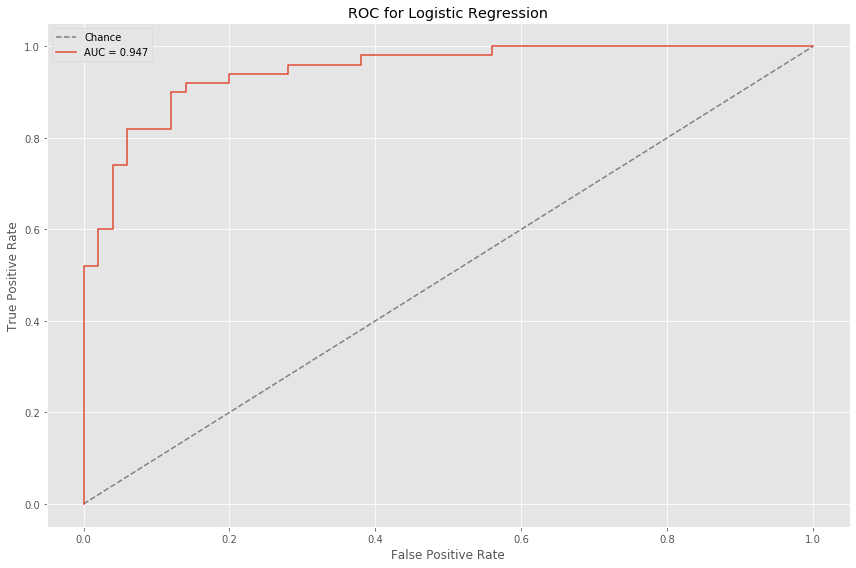

In [28]:
# Plotting the ROC Curve
predictions = model.predict(X_test)

print("\nPart 3.B: The grey line represents a random guess.")
plot_roc(y_test,predictions)